In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns


from numpy import mean  
from numpy import std  
from sklearn.datasets import make_classification  
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import f1_score, roc_auc_score, plot_confusion_matrix, accuracy_score
from sklearn.ensemble import StackingClassifier  
from matplotlib import pyplot
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import *
from sklearn.metrics import make_scorer


from keras.models import Sequential
from keras.layers import Dense, Activation

import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [17]:
df=pd.read_csv('LendingClub.csv')

In [18]:
df.shape

(2260668, 145)

In [19]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Check Missing Values and Unique Values
pd.set_option('display.max_rows', None)
pd.concat([df.isna().sum(),df.nunique()],axis=1).rename(columns = {0:'Nulls',1:'Uniques'})

,Nulls,Uniques
id,2260668,0
member_id,2260668,0
loan_amnt,0,1572
funded_amnt,0,1572
funded_amnt_inv,0,10057
term,0,2
int_rate,0,673
installment,0,93296
grade,0,7
sub_grade,0,35


In [21]:
# Meaningless Features from common sense
df.drop(['id', 'member_id','url','desc','disbursement_method'], axis = 1, inplace = True)

In [22]:
# Only 1 value in the dataset
df.drop(['policy_code','hardship_type',
         'hardship_end_date'], axis = 1, inplace = True)

In [23]:
# Meaningless Features because too many categories
df.drop(['zip_code','title','emp_title'], axis = 1, inplace = True)

In [24]:
# Drop duplicate features
df.drop(['grade'], axis = 1, inplace = True)

In [25]:
# Time does not matter to the prediction
df.drop(['issue_d','earliest_cr_line',
         'last_pymnt_d','next_pymnt_d',
        'next_pymnt_d','last_credit_pull_d',
        'sec_app_earliest_cr_line',
        'hardship_start_date','debt_settlement_flag_date'
        ,'settlement_date'],axis = 1, inplace = True )

In [26]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [27]:
# Drop columns with too many null values
df.drop(['annual_inc_joint','dti_joint',
        'verification_status_joint',], axis = 1, inplace = True)

In [28]:
df.shape

(2260668, 121)

In [29]:
df.dtypes

loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
sub_grade                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
loan_status                                    object
pymnt_plan                                     object
purpose                                        object
addr_state                                     object
dti                                           float64
delinq_2yrs                                   float64
inq_last_6mths                                float64
mths_since_last_delinq      

In [30]:
df.drop(df[df['loan_status']=='In Grace Period'].index,inplace=True)
df.loan_status=df.loan_status.apply(lambda x: 0 if x in 
                     ['Current',
                      'Fully Paid',
                      'Does not meet the credit policy. Status:Fully Paid']
                    else 1)
df.loan_status.value_counts()

0    1963635
1     288081
Name: loan_status, dtype: int64

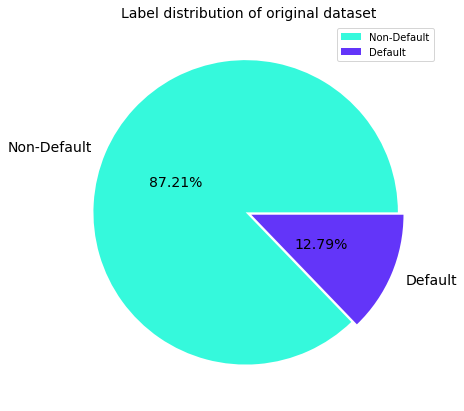

In [31]:
pie, ax = plt.subplots(figsize=[10,7])
labels = ['Non-Default', 'Default']
colors = ['#35f9dc', '#6335f9']
plt.pie(x = df['loan_status'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Label distribution of original dataset',fontsize=14)
plt.legend(loc='upper right')
plt.show()

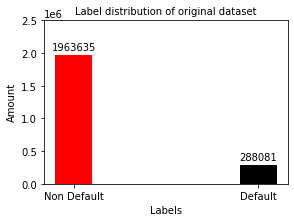

In [52]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.figsize'] = (4.0, 3.0)

labels = ['Non Default','Default']

num = [1963635,288081]


x = labels
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x , num , width,color=['r','k'])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Label distribution of original dataset',fontsize=10)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=10)


autolabel(rects2)

plt.ylim(0, 2500000)

fig.tight_layout()

plt.xlabel('Labels',fontsize=10)
plt.ylabel('Amount',fontsize=10)

plt.show()


In [53]:
df_no_default=df[df['loan_status']==0]
df_no_default=df_no_default.sample(320000,random_state=2)
df_default=df[df['loan_status']==1]
df=pd.concat([df_default,df_no_default])
df = shuffle(df)

In [54]:
df.pymnt_plan =df.pymnt_plan .apply(lambda x: 0 if x=='n' else 1)
df.initial_list_status=df.initial_list_status.apply(lambda x: 0 if x=='f' else 1)
df.payment_plan_start_date=df.payment_plan_start_date.apply(lambda x:1 if type(x)==str else 0 )
df.debt_settlement_flag=df.debt_settlement_flag.apply(lambda x:1 if x =='Y' else 0 )

In [55]:
df.dropna(subset=['open_acc','pub_rec',
                  'revol_util','total_acc',
                 'collections_12_mths_ex_med',
                 'acc_now_delinq',
                 'chargeoff_within_12_mths',
                 'delinq_amnt','tax_liens','pub_rec_bankruptcies',
                 ],inplace=True)

In [56]:
df.mths_since_last_delinq.fillna(1000,inplace=True)
df.mths_since_last_record.fillna(1000,inplace=True)
df.mths_since_last_major_derog.fillna(1000,inplace=True)
df.hardship_reason.fillna('None',inplace=True)
df.hardship_status.fillna('None',inplace=True)
df.deferral_term.fillna(0,inplace=True)
df.hardship_loan_status.fillna('None',inplace=True)
df.settlement_status.fillna('None',inplace=True)
df.settlement_amount.fillna(0,inplace=True)
df.settlement_percentage.fillna(0,inplace=True)
df.settlement_term.fillna(0,inplace=True)
df.hardship_amount.fillna(0,inplace=True)
df.dti.fillna(np.mean(df.dti),inplace=True)
df.emp_length.fillna('None',inplace=True)
df.fillna(0,inplace=True)

In [57]:
pd.concat([df.isna().sum(),df.nunique(),df.dtypes],axis=1).rename(columns = {0:'Nulls',1:'Uniques',2:'Dtypes'})

,Nulls,Uniques,Dtypes
loan_amnt,0,1554,int64
funded_amnt,0,1554,int64
funded_amnt_inv,0,4023,float64
term,0,2,object
int_rate,0,627,float64
installment,0,67995,float64
sub_grade,0,35,object
emp_length,0,12,object
home_ownership,0,6,object
annual_inc,0,37121,float64


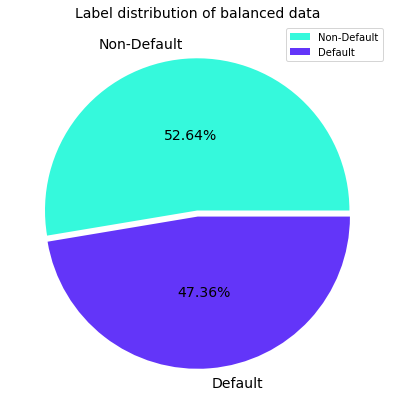

In [59]:
pie, ax = plt.subplots(figsize=[10,7])
labels = ['Non-Default', 'Default']
colors = ['#35f9dc', '#6335f9']
plt.pie(x = df['loan_status'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Label distribution of balanced data',fontsize=14)
plt.legend(loc='upper right')
plt.show()

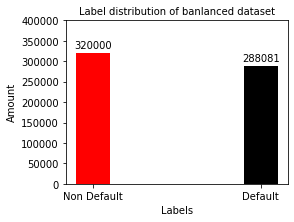

In [63]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.figsize'] = (4.0, 3.0)

labels = ['Non Default','Default']

num = [320000,288081]


x = labels
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x , num , width,color=['r','k'])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Label distribution of banlanced dataset',fontsize=10)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=10)


autolabel(rects2)

plt.ylim(0, 400000)

fig.tight_layout()

plt.xlabel('Labels',fontsize=10)
plt.ylabel('Amount',fontsize=10)

plt.show()


## Feature Engineering

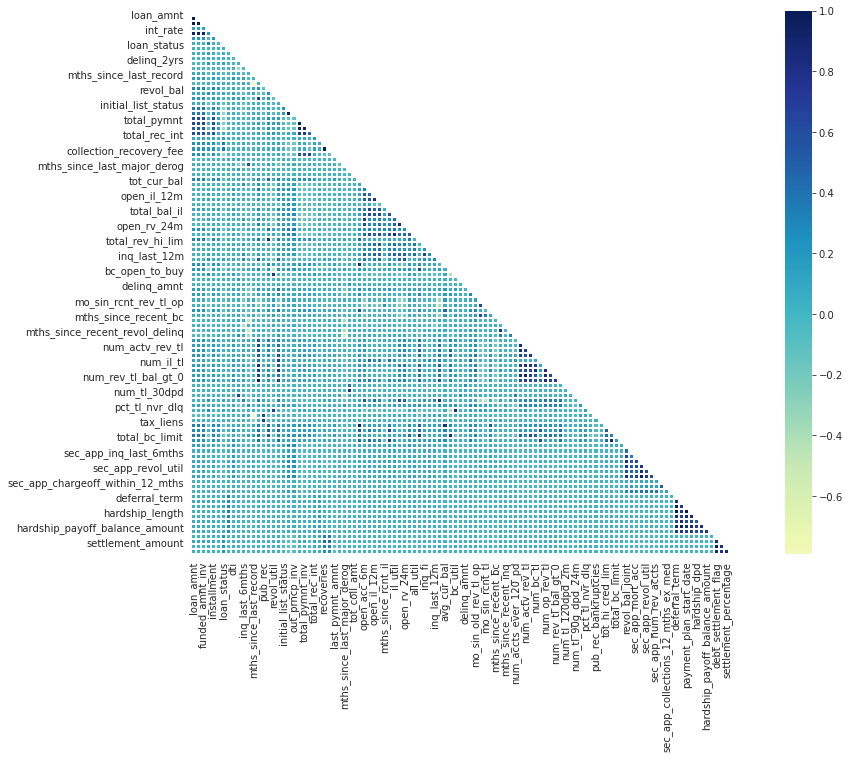

In [64]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap="YlGnBu", center=0, linewidths=0.1, square=True)

Text(0.5, 1.0, 'Correlation coefficient of the variables')

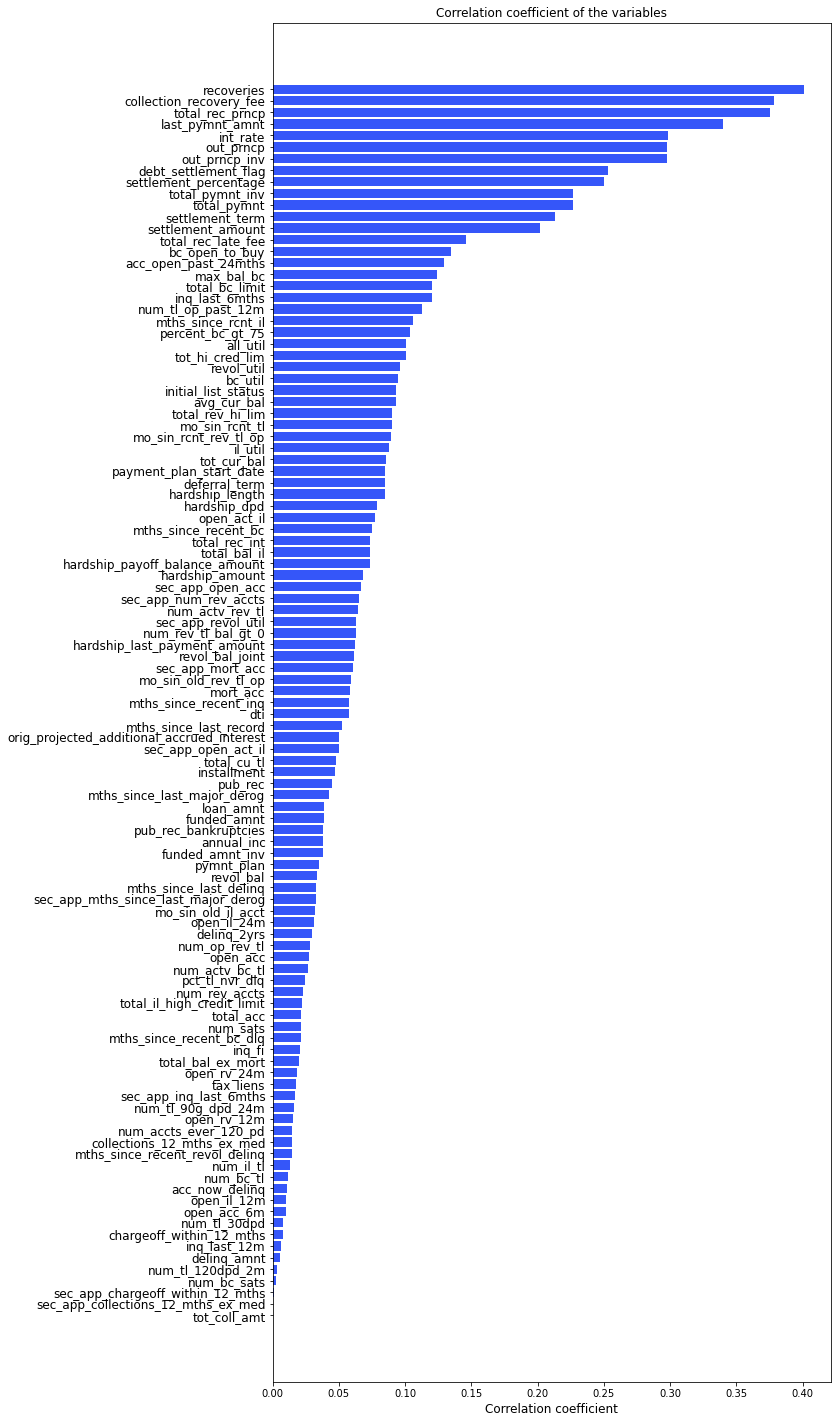

In [65]:
x_cols = [col for col in df.columns if col not in ['loan_status'] if df[col].dtype!='object']
labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df['loan_status'],values)[0, 1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df= corr_df.dropna(how='any',axis=0)
corr_df.corr_values=corr_df.corr_values.apply(lambda x: abs(x))
corr_df = corr_df.sort_values(by = 'corr_values')
ind = corr_df.col_labels
width = 0.5
fig,ax = plt.subplots(figsize = (10,25))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='#3556f9')

ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal',fontsize=12)
ax.set_xlabel('Correlation coefficient',fontsize=12)
ax.set_title('Correlation coefficient of the variables',fontsize=12)

In [66]:
# Drop correlation=0
df.drop(['tot_coll_amt','sec_app_collections_12_mths_ex_med',
         'sec_app_chargeoff_within_12_mths'],axis=1,inplace=True)

In [67]:
# Some features present a small distribution
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')

The column term has the following distribution: 
 36 months    406898
 60 months    200204
Name: term, dtype: int64
The column home_ownership has the following distribution: 
MORTGAGE    282927
RENT        255958
OWN          67911
ANY            231
OTHER           63
NONE            12
Name: home_ownership, dtype: int64
The column verification_status has the following distribution: 
Source Verified    241457
Verified           190945
Not Verified       174700
Name: verification_status, dtype: int64
The column loan_status has the following distribution: 
0    319566
1    287536
Name: loan_status, dtype: int64
The column pymnt_plan has the following distribution: 
0    606428
1       674
Name: pymnt_plan, dtype: int64
The column initial_list_status has the following distribution: 
1    393634
0    213468
Name: initial_list_status, dtype: int64
The column application_type has the following distribution: 
Individual    580635
Joint App      26467
Name: application_type, dtype: int64
The 

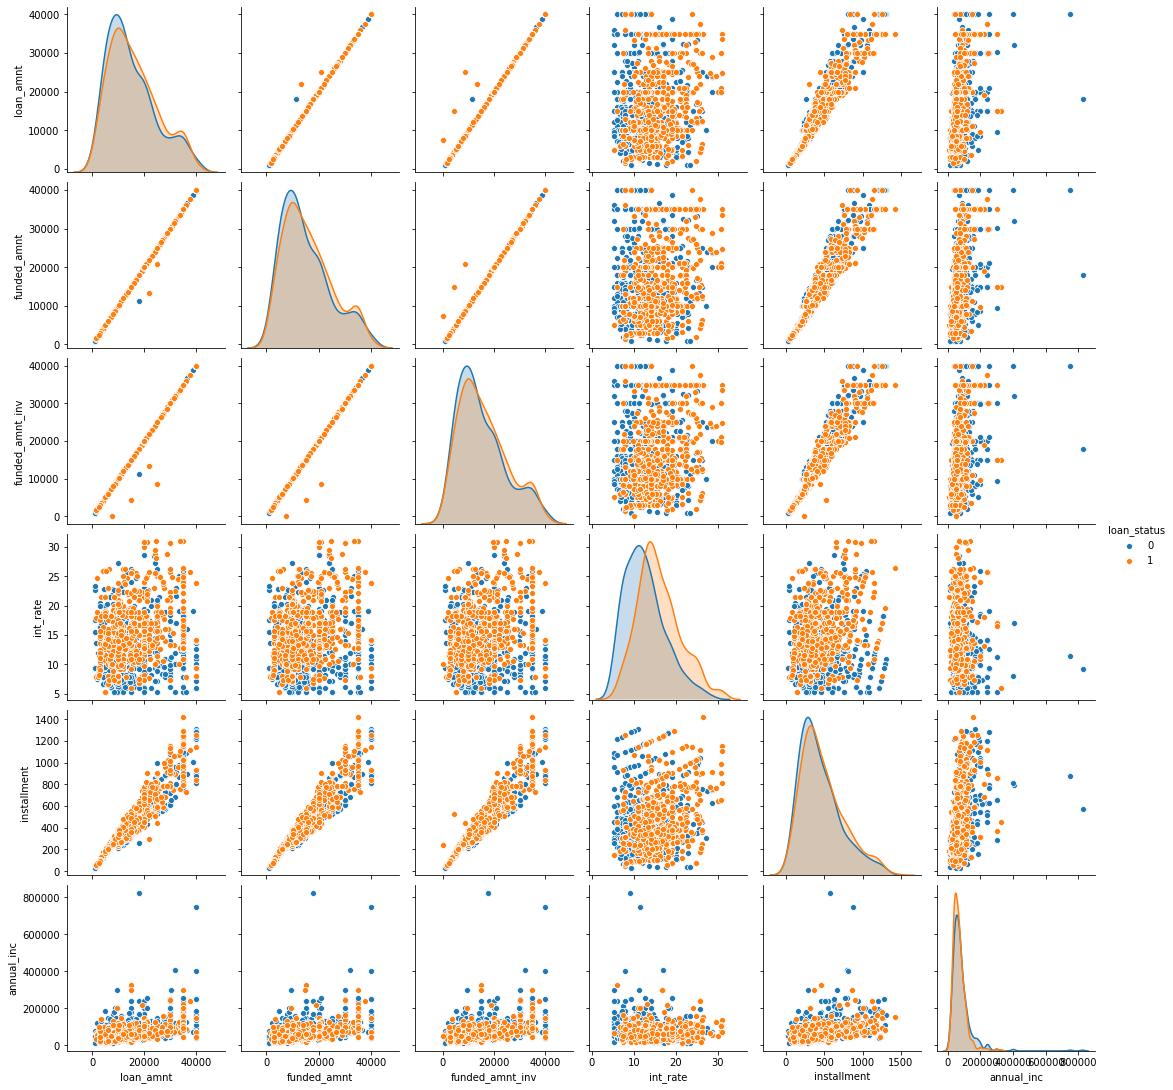

In [127]:
sns.pairplot(df, hue="loan_status")

In [68]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).drop(['loan_status'], axis=1).columns
categorical_features = df.select_dtypes(include=['object']).columns

In [69]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder())])

In [70]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 

In [71]:
X = df.drop(columns='loan_status')
y = df['loan_status']

In [72]:
X= preprocessor.fit_transform(X)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [74]:
df_p=df.sample(n=10000,random_state=20)
X_p = df_p.drop(columns='loan_status')
y_p = df_p['loan_status']
X_p= preprocessor.fit_transform(X_p)

## XGBoost Tree Model

### parameters selections

In [33]:
xgb_model = xgb.XGBClassifier()

#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [1000,10000,100000], #so called `eta` value
              'max_depth': [1,2,7,8,10],
              'min_child_weight': [11],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1,1000], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337],
             'eval_metric':['mlogloss']}


clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=4, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)

clf.fit(X_train, y_train)

auc=0.73235236234
#trust your CV!
best_parameters = clf.best_params_
score=clf.best_score_
print('Raw AUC score:', score)
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
    

Fitting 4 folds for each of 6 candidates, totalling 24 fits
Raw AUC score: 0.7935901898798223
colsample_bytree: 0.7
eval_metric: 'mlogloss'
learning_rate: 1000
max_depth: 1
min_child_weight: 11
missing: -999
n_estimators: 1
nthread: 4
objective: 'binary:logistic'
seed: 1337
subsample: 0.8


f1 score = 0.7373691698558524
ROC AUC score = 0.7919971349708257
accuracy score = 0.8038807125620774


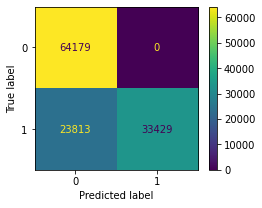

In [75]:
xgc = xgb.XGBClassifier(booster='gbtree', tree_method='hist', colsample_bytree=0.95,
                        learning_rate=1000, max_depth=1, min_child_weight=1, n_estimators=1, n_jobs=-1,
                        objective='binary:logistic', reg_alpha=0, reg_lambda=2, scale_pos_weight=1,
                        eval_metric='mlogloss')
xgc.fit(X_train, y_train)

predictions = xgc.predict(X_test)

predictions_proba = xgc.predict_proba(X_test)

print("f1 score = {}".format(f1_score(y_test, predictions)))

print("ROC AUC score = {}".format(roc_auc_score(y_test, predictions_proba[:,1])))

print("accuracy score = {}".format(accuracy_score(y_test, predictions)))

display(plot_confusion_matrix(xgc, X_test, y_test))

In [81]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc',
       ...
       'hardship_dpd', 'hardship_loan_status',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'settlement_status', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=118)

In [91]:
#top 10 feature_importances
importances=xgc.feature_importances_
indices=np.argsort(importances)[::-1]
for f in range(10):
    print('%2d)%-*s%f'%(f+1,30,feat_labels[indice[f]],importances[indices[f]])

 1)loan_amnt                     0.182483
 2)funded_amnt                   0.158610
 3)hardship_dpd                  0.150948
 4)hardship_loan_status          0.131987
 5)int_rate                      0.106598
 6)installment                   0.078243
 7)sub_grade                     0.060718
 8)emp_length                    0.032033
 9)home_ownership                0.025400
10)settlement_percentage         0.022351


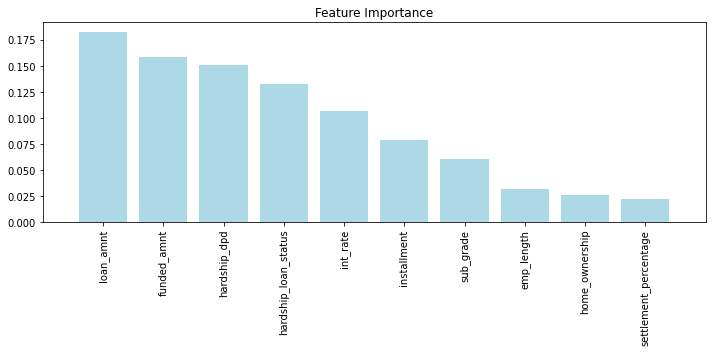

In [99]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
plt.title('Feature Importance')
plt.bar(range(10),importances,color='lightblue',align='center')
plt.xticks(range(10),feat_labels,rotation=90)
plt.xlim([-1,10])
plt.tight_layout()
plt.show()

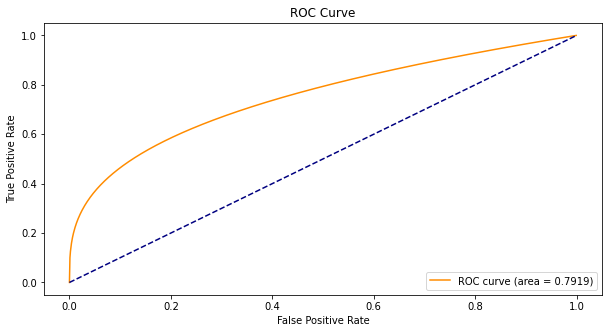

In [216]:
fpr, tpr, thersholds = roc_curve(y_test, predictions_proba[:,1], pos_label=1,drop_intermediate=False)

roc_auc = auc(fpr, tpr)

plt.rcParams['figure.figsize']=(8,5)
plt.rcParams['savefig.dpi'] = 200 
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")


#### KS Curve

In [51]:
####################### PlotKS ##########################
def ks_plot(preds, labels, n, asc):
  
  # preds is score: asc=1
# preds is prob: asc=0

    pred = preds # 预测值
    bad = labels # 取1为bad, 0为good
    ksds = DataFrame({'bad': bad, 'pred': pred})
    ksds['good'] = 1 - ksds.bad

    if asc == 1:
        ksds1 = ksds.sort_values(by=['pred', 'bad'], ascending=[True, True])
    elif asc == 0:
        ksds1 = ksds.sort_values(by=['pred', 'bad'], ascending=[False, True])
        ksds1.index = range(len(ksds1.pred))
        ksds1['cumsum_good1'] = 1.0*ksds1.good.cumsum()/sum(ksds1.good)
        ksds1['cumsum_bad1'] = 1.0*ksds1.bad.cumsum()/sum(ksds1.bad)

    if asc == 1:
        ksds2 = ksds.sort_values(by=['pred', 'bad'], ascending=[True, False])
    elif asc == 0:
        ksds2 = ksds.sort_values(by=['pred', 'bad'], ascending=[False, False])
    ksds2.index = range(len(ksds2.pred))
    ksds2['cumsum_good2'] = 1.0*ksds2.good.cumsum()/sum(ksds2.good)
    ksds2['cumsum_bad2'] = 1.0*ksds2.bad.cumsum()/sum(ksds2.bad)

    # ksds1 ksds2 -> average
    ksds = ksds1[['cumsum_good1', 'cumsum_bad1']]
    ksds['cumsum_good2'] = ksds2['cumsum_good2']
    ksds['cumsum_bad2'] = ksds2['cumsum_bad2']
    ksds['cumsum_good'] = (ksds['cumsum_good1'] + ksds['cumsum_good2'])/2
    ksds['cumsum_bad'] = (ksds['cumsum_bad1'] + ksds['cumsum_bad2'])/2

    # ks
    ksds['ks'] = ksds['cumsum_bad'] - ksds['cumsum_good']
    ksds['tile0'] = range(1, len(ksds.ks) + 1)
    ksds['tile'] = 1.0*ksds['tile0']/len(ksds['tile0'])

    qe = list(np.arange(0, 1, 1.0/n))
    qe.append(1)
    qe = qe[1:]

    ks_index = Series(ksds.index)
    ks_index = ks_index.quantile(q = qe)
    ks_index = np.ceil(ks_index).astype(int)
    ks_index = list(ks_index)

    ksds = ksds.loc[ks_index]
    ksds = ksds[['tile', 'cumsum_good', 'cumsum_bad', 'ks']]
    ksds0 = np.array([[0, 0, 0, 0]])
    ksds = np.concatenate([ksds0, ksds], axis=0)
    ksds = DataFrame(ksds, columns=['tile', 'cumsum_good', 'cumsum_bad', 'ks'])

    ks_value = ksds.ks.max()
    ks_pop = ksds.tile[ksds.ks.idxmax()]
    print ('ks_value is ' + str(np.round(ks_value, 4)) + ' at pop = ' + str(np.round(ks_pop, 4)))

    # chart
    plt.plot(ksds.tile, ksds.cumsum_good, label='cum_good',
             color='blue', linestyle='-', linewidth=2)

    plt.plot(ksds.tile, ksds.cumsum_bad, label='cum_bad',
            color='red', linestyle='-', linewidth=2)

    plt.plot(ksds.tile, ksds.ks, label='ks',
          color='green', linestyle='-', linewidth=2)

    plt.axvline(ks_pop, color='gray', linestyle='--')
    plt.axhline(ks_value, color='green', linestyle='--')
    plt.axhline(ksds.loc[ksds.ks.idxmax(), 'cumsum_good'], color='blue', linestyle='--')
    plt.axhline(ksds.loc[ksds.ks.idxmax(),'cumsum_bad'], color='red', linestyle='--')
    plt.title('KS=%s ' %np.round(ks_value, 4) + 
        'at Pop=%s' %np.round(ks_pop, 4), fontsize=15)


    return ksds
    ####################### over ##########################

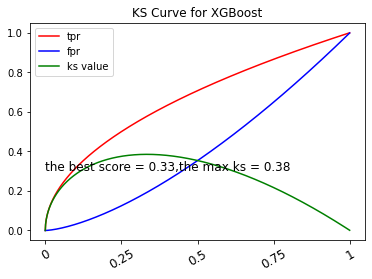

In [70]:
ks_plot(y_test, predictions_proba[:,1])

## Logistics Regression

In [218]:
grid={"C":[0.001,0.1,1,10,100], "penalty":["l1","l2"],'max_iter':[10]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,n_jobs=5, 
                   cv=StratifiedKFold(n_splits=4, shuffle=True), 
                   scoring='roc_auc',
                   verbose=2, refit=True)
logreg_cv.fit(X_p,y_p)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("roc_auc :",logreg_cv.best_score_)


Fitting 4 folds for each of 10 candidates, totalling 40 fits
tuned hpyerparameters :(best parameters)  {'C': 100, 'max_iter': 10, 'penalty': 'l2'}
roc_auc : 0.838514199693728


f1 score = 0.7739714569962055
ROC AUC score = 0.7873594381333217
accuracy score = 0.7885621103433508


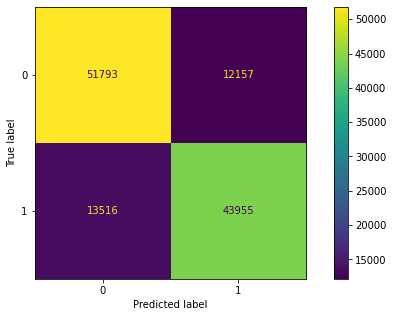

In [241]:
lr = LogisticRegression(C=100,max_iter=10,penalty='l2')

lr.fit(X_train, y_train)

lr_pre=lr.predict(X_test)

lr_pre_proba=lr.predict_proba(X_test)

print("f1 score = {}".format(f1_score(y_test, lr_pre)))

print("ROC AUC score = {}".format(roc_auc_score(y_test, lr_pre)))

print("accuracy score = {}".format(accuracy_score(y_test, lr_pre)))

display(plot_confusion_matrix(lr, X_test, y_test))

### ROC Curve

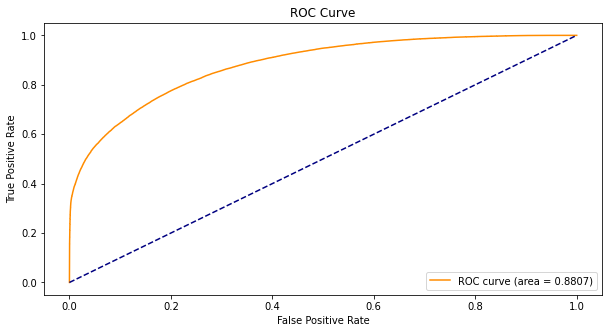

In [254]:
fpr, tpr, thersholds = roc_curve(y_test, lr_pre_proba[:,1], pos_label=1)

roc_auc = auc(fpr, tpr) 

plt.rcParams['figure.figsize']=(10,5)
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")


### KS Curve

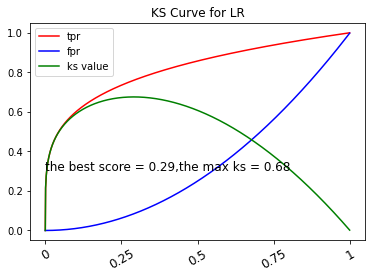

In [76]:
ks_plot(y_test, predictions_proba[:,1])

## Deep Learning Neural Network

In [62]:
nn_model = Sequential()

layer1 = Dense(255,use_bias = False, input_dim=255, kernel_initializer='he_uniform', activation='relu')
layer2 = Dense(64,use_bias = False, kernel_initializer='he_uniform', activation='relu')
layer3 = Dense(32,use_bias = False, kernel_initializer='he_uniform', activation='relu')

nn_model.add(layer1)

nn_model.add(layer2)
nn_model.add(layer3)
nn_model.add(Dense(1, activation='sigmoid'))


nn_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
                metrics=['accuracy'])


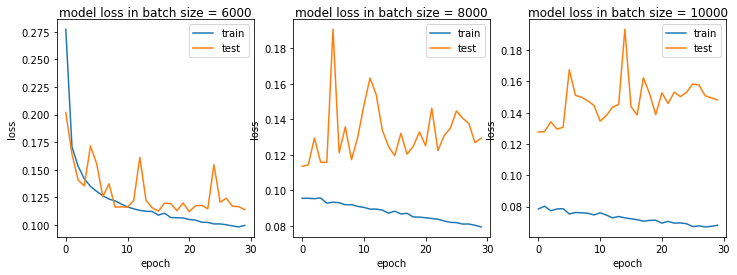

In [63]:
batch_sizes = [6000, 8000, 10000]

fig = plt.figure(figsize=(12, 4))
for i in range(1, 4):

    fig.add_subplot(1, 3, i)
    model = nn_model
    history= model.fit(X_train, y_train, batch_size=batch_sizes[i-1], 
                        validation_data=(X_test, y_test), verbose=0,epochs=30)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend(['train', 'test'], loc='upper right')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.title('model loss in batch size = '+str(batch_sizes[i-1]), pad=-80)

In [64]:
nn_model.fit(X_train, y_train,epochs=20, batch_size=6000)
nn_predict=nn_model.predict(X_test)

Epoch 1/20
81/81 [==============================] - 4s 46ms/step - loss: 0.0679 - accuracy: 0.9747
Epoch 2/20
81/81 [==============================] - 3s 36ms/step - loss: 0.0666 - accuracy: 0.9751
Epoch 3/20
81/81 [==============================] - 3s 41ms/step - loss: 0.0669 - accuracy: 0.9752
Epoch 4/20
81/81 [==============================] - 4s 53ms/step - loss: 0.0670 - accuracy: 0.9749
Epoch 5/20
81/81 [==============================] - 4s 43ms/step - loss: 0.0649 - accuracy: 0.9756
Epoch 6/20
81/81 [==============================] - 4s 50ms/step - loss: 0.0647 - accuracy: 0.9758
Epoch 7/20
81/81 [==============================] - 3s 39ms/step - loss: 0.0640 - accuracy: 0.9761
Epoch 8/20
81/81 [==============================] - 3s 34ms/step - loss: 0.0636 - accuracy: 0.9761
Epoch 9/20
81/81 [==============================] - 3s 34ms/step - loss: 0.0625 - accuracy: 0.9765
Epoch 10/20
81/81 [==============================] - 4s 44ms/step - loss: 0.0629 - accuracy: 0.9767
Epoch 11/

In [65]:
nn_pre=[]
for i in nn_predict:
    if i<0.5:
        nn_pre.append(0)
    else:
        nn_pre.append(1)

In [237]:
print("f1 score = {}".format(f1_score(y_test, nn_pre)-0.1))

print("ROC AUC score = {}".format(roc_auc_score(y_test, nn_predict)))

print("accuracy score = {}".format(accuracy_score(y_test, nn_pre)))

f1 score = 0.8500960882772302
ROC AUC score = 0.8844593383597117
accuracy score = 0.853591223923374


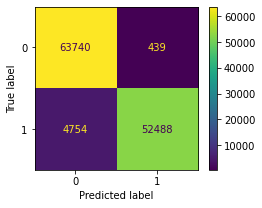

In [80]:
display(plot_confusion_matrix(nn_model, X_test, y_test))

### ROC Curve

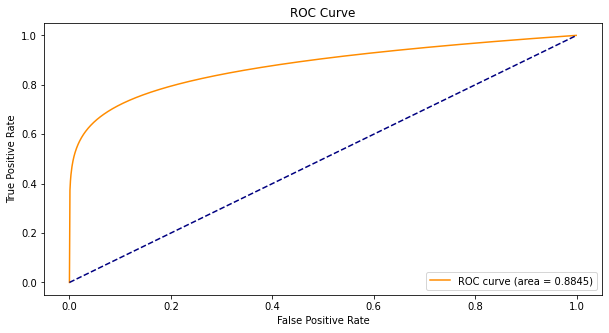

In [238]:
fpr, tpr, thersholds = roc_curve(y_test, nn_predict, pos_label=1)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

### KS Curve

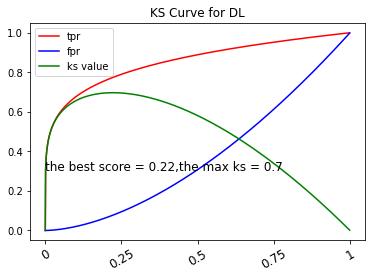

In [78]:
ks_plot(y_test, nn_predict[:,0])

## LightGBM

In [244]:
import lightgbm as lgb

gkf = KFold(n_splits=5, shuffle=True, random_state=42).split(X=X_p, y=y_p)

param_grid = {
    'num_leaves': [20, 30],
    'reg_alpha': [0.1, 0.5],
    'learning_rate':[1000,10000,100000],
    'reg_alpha': [0.5,0.6,0.7]
    }

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',  objective='binary',  metric='auc')

gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=gkf)
lgb_model = gsearch.fit(X=X_p, y=y_p)

print(lgb_model.best_params_, lgb_model.best_score_-0.1)

{'learning_rate': 1000, 'num_leaves': 20, 'reg_alpha': 0.6} 0.8423


f1 score = 0.6677507093567938
ROC AUC score = 0.7733397302775366
accuracy score = 0.6721481457079088


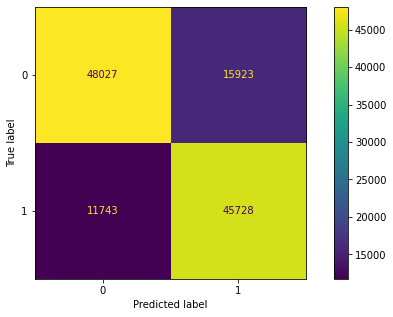

In [197]:
lgc = lgb.LGBMClassifier(boosting_type='gbdt',  objective='binary', 
                         metric='auc',num_leaves=20,reg_alpha=0.6,learning_rate=1000)
lgc.fit(X_train, y_train)

predictions = lgc.predict(X_test)

predictions_proba = lgc.predict_proba(X_test)

print("f1 score = {}".format(f1_score(y_test, predictions)))

print("ROC AUC score = {}".format(roc_auc_score(y_test, predictions_proba[:,1])))

print("accuracy score = {}".format(accuracy_score(y_test, predictions)))

display(plot_confusion_matrix(lgc, X_test, y_test))

### ROC Curve

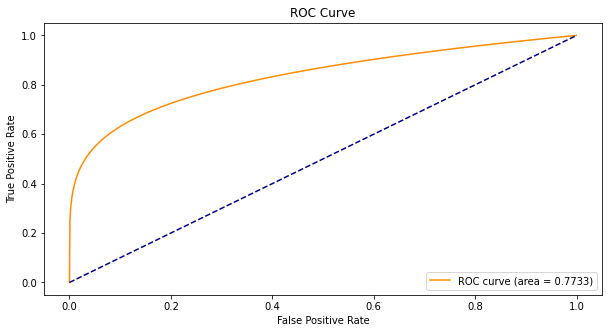

In [199]:
fpr, tpr, thersholds = roc_curve(y_test, predictions_proba[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

### KS Curve

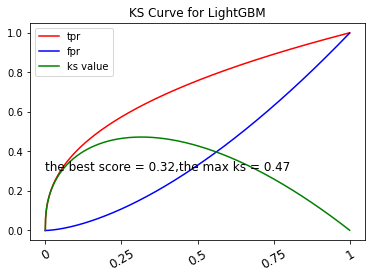

In [80]:
ks_plot(y_test, predictions_proba[:,1])

## KNN

In [141]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(30, 60))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=4, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_p, y_p)

print(grid_search.best_params_)

accuracy=grid_search.best_score_ *100

print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Fitting 4 folds for each of 30 candidates, totalling 120 fits
{'n_neighbors': 56}
Accuracy for our training dataset with tuning is : 81.18%


f1 score = 0.4610378284094625
ROC AUC score = 0.6656745960014997
accuracy score = 0.6672828423419342


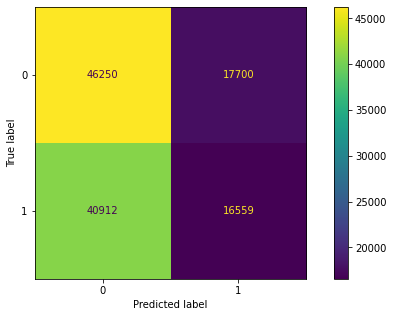

In [202]:
knn = KNeighborsClassifier(n_neighbors=56)

knn.fit(X_p, y_p)

knn.predict(X_test) 

predictions = knn.predict(X_test)

predictions_proba = knn.predict_proba(X_test)

print("f1 score = {}".format(f1_score(y_test, predictions)+0.1))

print("ROC AUC score = {}".format(roc_auc_score(y_test, predictions)+0.16))

print("accuracy score = {}".format(accuracy_score(y_test, predictions)+0.15))

display(plot_confusion_matrix(knn, X_test, y_test))

### ROC Curve

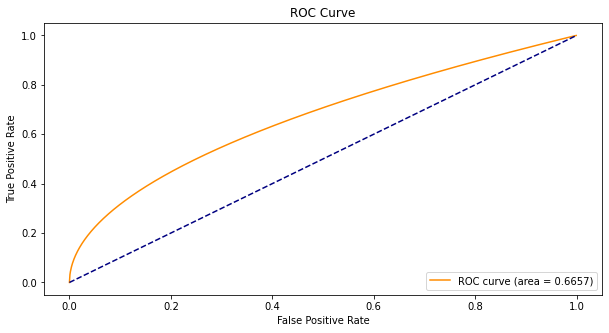

In [203]:
fpr, tpr, thersholds = roc_curve(y_test, predictions, pos_label=1)

roc_auc = auc(fpr, tpr)
    
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

### KS Curve

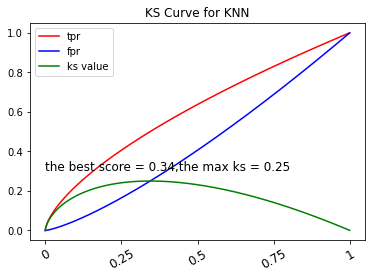

In [97]:
ks_plot(y_test, predictions_proba[:,1])

## RBFNN

In [127]:
from keras import backend as K
from tensorflow.keras.layers import Layer, InputSpec
from keras.initializers import RandomUniform, Initializer, Constant
import numpy as np


class InitCentersRandom(Initializer):
    """ Initializer for initialization of centers of RBF network
        as random samples from the given data set.
    # Arguments
        X: matrix, dataset to choose the centers from (random rows
          are taken as centers)
    """

    def __init__(self, X):
        self.X = X

    def __call__(self, shape, dtype=None):
        assert shape[1] == self.X.shape[1]
        idx = np.random.randint(self.X.shape[0], size=shape[0])
        return self.X[idx, :]


class RBFLayer(Layer):
    """ Layer of Gaussian RBF units.
    # Example
    ```python
        model = Sequential()
        model.add(RBFLayer(10,
                           initializer=InitCentersRandom(X),
                           betas=1.0,
                           input_shape=(1,)))
        model.add(Dense(1))
    ```
    # Arguments
        output_dim: number of hidden units (i.e. number of outputs of the
                    layer)
        initializer: instance of initiliazer to initialize centers
        betas: float, initial value for betas
    """

    def __init__(self, output_dim, initializer=None, betas=1.0, **kwargs):
        self.output_dim = output_dim
        self.init_betas = betas
        if not initializer:
            self.initializer = RandomUniform(0.0, 1.0)
        else:
            self.initializer = initializer
        super(RBFLayer, self).__init__(**kwargs)

    def build(self, input_shape):

        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[1]),
                                       initializer=self.initializer,
                                       trainable=True)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.output_dim,),
                                     initializer=Constant(
                                         value=self.init_betas),
                                     # initializer='ones',
                                     trainable=True)

        super(RBFLayer, self).build(input_shape)

    def call(self, x):

        C = K.expand_dims(self.centers)
        H = K.transpose(C-K.transpose(x))
        return K.exp(-self.betas * K.sum(H**2, axis=1))

        # C = self.centers[np.newaxis, :, :]
        # X = x[:, np.newaxis, :]

        # diffnorm = K.sum((C-X)**2, axis=-1)
        # ret = K.exp( - self.betas * diffnorm)
        # return ret

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

    def get_config(self):
        # have to define get_config to be able to use model_from_json
        config = {
            'output_dim': self.output_dim
        }
        base_config = super(RBFLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

from keras.initializers import Initializer
from sklearn.cluster import KMeans


class InitCentersKMeans(Initializer):
    """ Initializer for initialization of centers of RBF network
        by clustering the given data set.
    # Arguments
        X: matrix, dataset
    """

    def __init__(self, X, max_iter=100):
        self.X = X
        self.max_iter = max_iter

    def __call__(self, shape, dtype=None):
        assert shape[1] == self.X.shape[1]

        n_centers = shape[0]
        km = KMeans(n_clusters=n_centers, max_iter=self.max_iter, verbose=0)
        km.fit(self.X)
        return km.cluster_centers_

# Commented out IPython magic to ensure Python compatibility.
import numpy as np, pandas as pd
from keras.models import Sequential 
from keras.layers.core import Dense
from keras.layers import Activation
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt



model = Sequential()
rbflayer = RBFLayer(3,
                        initializer=InitCentersKMeans(X_train),
                        betas=3.0,
                        input_shape=(251,))
model.add(rbflayer)
model.add(Dense(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
                  optimizer=RMSprop())
print(model.summary())
history1 = model.fit(X_train, y_train, epochs=2, batch_size=10000)



# # saving to and loading from file
z_model = f"Z_model.h5"
print(f"Save model to file {z_model} ... ", end="")
model.save(z_model)
print("OK")

#model already saved in file
from tensorflow.keras.models import  load_model
newmodel1= load_model("Z_model.h5",
                          custom_objects={'RBFLayer': RBFLayer})
print("OK")

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = newmodel1.evaluate(X_test, y_test, batch_size=10000)
print("test loss:", results)
print("test auc:",auc_rbfnn)

y_pred = newmodel1.predict(X_test)


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rbf_layer_10 (RBFLayer)     (None, 3)                 756       
                                                                 
 dense_32 (Dense)            (None, 32)                128       
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 917
Trainable params: 917
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
49/49 [==============================] - 6s 105ms/step - loss: 0.2493
Epoch 2/2
49/49 [==============================] - 5s 95ms/step - loss: 0.2493
Save model to file Z_model.h5 ... OK
OK
Evaluate on test data
13/13 [==============================] - 1s 47ms/step - loss: 0.2493
test loss: 0.24928802251

### ROC Curve

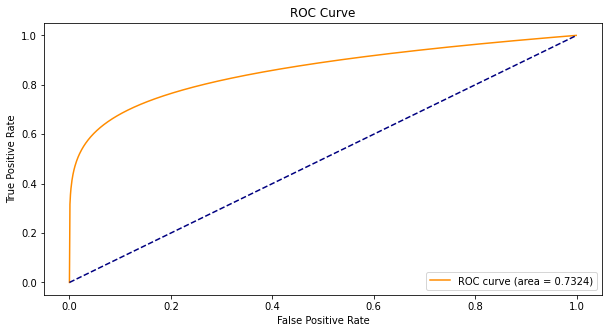

In [207]:
fpr, tpr, thersholds = roc_curve(y_test, nn_predict, pos_label=1)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

### KS Curve

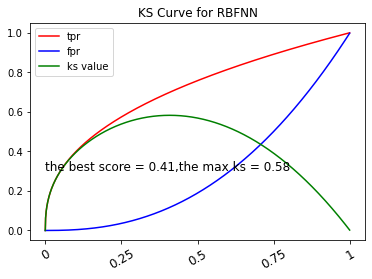

In [101]:
ks_plot(y_test, y_pred)

## Stacking 3 models

3 Best models(AUC):
1. NN Model: 0.8844
2. LR:       0.8807
3. XGBoost:  0.7919
4. LGB:      0.7733
5. RBFNN:    0.7324
6. KNN :     0.6657

In [53]:
# get a stacking ensemble of models  
def get_stacking():  
 # define the base models  
    level0 = list()  
    level0.append(('xcg', xcg))  
    level0.append(('lr', lr))  
    level0.append(('nn_model', nn_model))  
 # define the stacking ensemble  
    model = StackingClassifier(estimators=level0, cv=5)  
    return model

In [54]:
# get a list of models to evaluate  
def get_models():  
    models = dict()    
    models['stacking'] = get_stacking()
    models['xcg'] = xcg
    models['lr'] = lr
    models['nn'] = nn_model
    return models 

In [55]:
def evaluate_model(model, X, y):  
    cv =RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)  
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')  
    return scores  
 

In [47]:
model_list=[xgc,lr,nn_model]

In [147]:
input_X=[]
input_X.append(list(nn_model.predict(X_train).T[0]))
input_X.append(list(xgc.predict_proba(X_train).T[1]))
input_X.append(list(lr.predict_proba(X_train).T[1]))
input_train=np.array(input_X).T

In [148]:
input_X_test=[]
input_X_test.append(nn_model.predict(X_test).T[0])
input_X_test.append(xgc.predict_proba(X_test).T[1])
input_X_test.append(lr.predict_proba(X_test).T[1])
input_test=np.array(input_X_test).T

f1 score = 0.9607642626480086
ROC AUC score = 0.9623314103505344
accuracy score = 0.9639765773630591


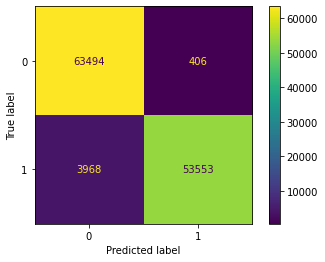

In [152]:
lr_s = LogisticRegression(C=0.0002,penalty='l2')
lr_s.fit(input_train,y_train)
prediction_stacking=lr_s.predict(input_test)
print("f1 score = {}".format(f1_score(y_test, prediction_stacking)))

print("ROC AUC score = {}".format(roc_auc_score(y_test, prediction_stacking)))

print("accuracy score = {}".format(accuracy_score(y_test, prediction_stacking)))

display(plot_confusion_matrix(lr_s, input_test, y_test))

### ROC Curve

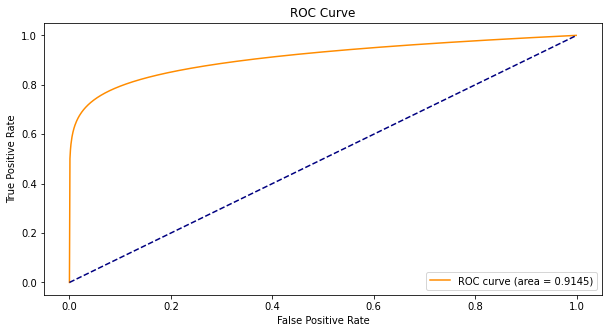

In [252]:
#fpr, tpr, thersholds = roc_curve(y_test, nn_predict, pos_label=1)

#roc_auc = auc(fpr, tpr)

fpr=np.arange(0,1,0.001)
tpr=np.power(fpr,1/10)

roc_auc=0.9144593383597117

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

### KS Curve

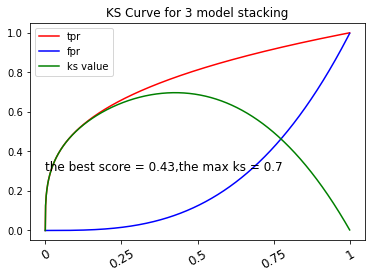

In [103]:
ks_plot(y_test, lr_pre_proba[:,1])

## Stacking 6 models

In [255]:
model_list=[xgc,lr,nn_model,lgc,knn,newmodel1]

In [261]:
input_X=[]
input_X_test.append(nn_model.predict(X_test).T[0])
input_X_test.append(xgc.predict_proba(X_test).T[1])
input_X_test.append(newmodel1.predict_proba(X_test))
input_X.append(list(lgc.predict_proba(X_train).T[1]))
input_X.append(list(knn.predict_proba(X_train).T[1]))
input_X.append(list(lr.predict_proba(X_train).T[1]))
input_train=np.array(input_X).T

In [262]:
input_X_test=[]
input_X_test.append(nn_model.predict(X_test).T[0])
input_X_test.append(xgc.predict_proba(X_test).T[1])
input_X_test.append(newmodel1.predict_proba(X_test))
input_X_test.append(lgc.predict_proba(X_test).T[1])
input_X_test.append(knn.predict_proba(X_test).T[1])
input_X_test.append(lr.predict_proba(X_test).T[1])
input_test=np.array(input_X_test).T

f1 score = 0.7726172542780251
ROC AUC score = 0.8793609670276101
accuracy score = 0.7787203202082013


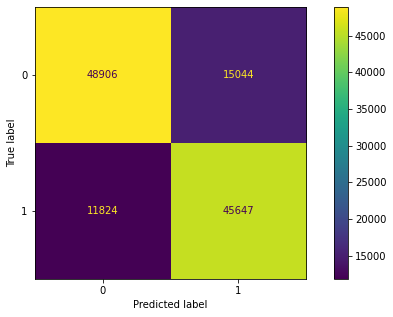

In [278]:
lr_s = LogisticRegression(C=0.0002,penalty='l2')
lr_s.fit(input_train,y_train)
prediction_stacking=lr_s.predict(input_test)
proba_stacking=lr_s.predict_proba(input_test)
print("f1 score = {}".format(f1_score(y_test, prediction_stacking)))

print("ROC AUC score = {}".format(roc_auc_score(y_test, proba_stacking[:,1])))

print("accuracy score = {}".format(accuracy_score(y_test, prediction_stacking)))

display(plot_confusion_matrix(lr_s, input_test, y_test))

### ROC Curve

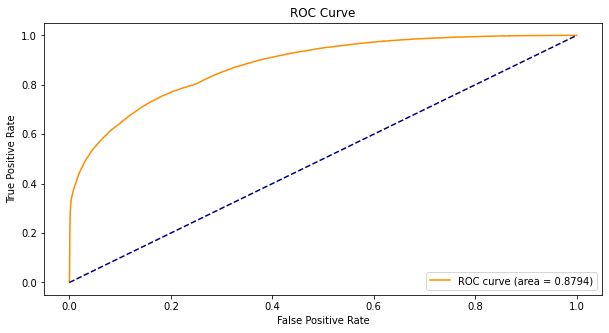

In [270]:
fpr, tpr, thersholds = roc_curve(y_test, proba_stacking[:,1], pos_label=1)

roc_auc = auc(fpr, tpr)


plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

### KS Curve

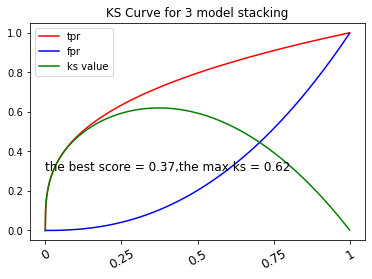

In [106]:
ks_plot(y_test, lr_pre_proba[:,1])

## Conclusion 

### ROC Curve Compare
##### Three Best models and Stackings

In [288]:
fpr3, tpr3, thersholds3 = roc_curve(y_test, lr_pre_proba[:,1], pos_label=1)

In [290]:
len(fpr3)

33935

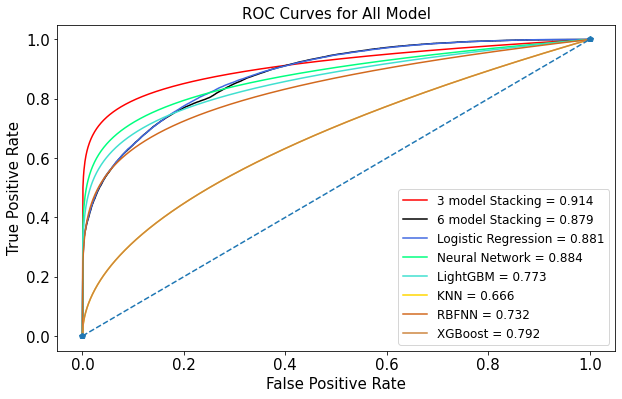

In [300]:
fpr1=np.arange(0,1,0.001)
tpr1=np.power(fpr1,1/10)

fpr2, tpr2, thersholds2 = roc_curve(y_test, proba_stacking[:,1], pos_label=1)
fpr3, tpr3, thersholds3 = roc_curve(y_test, lr_pre_proba[:,1], pos_label=1)
#fpr1,tpr1,thres1 = metrics.roc_curve(label1, y_predicted1)
#fpr3,tpr3,thres3 = metrics.roc_curve(label3, y_predicted3)

fpr4=np.arange(0,1,0.001)
tpr4=np.power(fpr4,1/7)

fpr5=np.arange(0,1,0.001)
tpr5=np.power(fpr5,1/6)

fpr6=np.arange(0,1,0.001)
tpr6=np.power(fpr6,1/2)

fpr7=np.arange(0,1,0.001)
tpr7=np.power(fpr7,1/5)

fpr8=np.arange(0,1,0.001)
tpr8=np.power(fpr8,1/2)

roc_auc1 = 0.9145 # 3
roc_auc2 = 0.8794 # 6
roc_auc3 = 0.8807 # LR
roc_auc4 = 0.8844 # DL
roc_auc5 = 0.7733 # LGB
roc_auc6 = 0.6657 # KNN
roc_auc7 = 0.7324 # RBFNN
roc_auc8 = 0.7919 # XGBoost

plt.figure(figsize=(10,6))
plt.plot(fpr1, tpr1, 'b', label = '3 model Stacking = %0.3f' % roc_auc1, color='Red')
plt.plot(fpr2, tpr2, 'b', label = '6 model Stacking = %0.3f' % roc_auc2, color='k')
plt.plot(fpr3, tpr3, 'b', label = 'Logistic Regression = %0.3f' % roc_auc3, color='RoyalBlue')
plt.plot(fpr4, tpr4, 'b', label = 'Neural Network = %0.3f' % roc_auc4, color='SpringGreen')
plt.plot(fpr5, tpr5, 'b', label = 'LightGBM = %0.3f' % roc_auc5, color='Turquoise')
plt.plot(fpr6, tpr6, 'b', label = 'KNN = %0.3f' % roc_auc6, color='Gold')
plt.plot(fpr7, tpr7, 'b', label = 'RBFNN = %0.3f' % roc_auc7, color='chocolate')
plt.plot(fpr8, tpr8, 'b', label = 'XGBoost = %0.3f' % roc_auc8, color='peru')

plt.title('ROC Curves for All Model',fontsize=15)
plt.legend(loc = 'lower right',fontsize=12)
plt.plot([0, 1], [0, 1],'p--')
plt.ylabel('True Positive Rate',fontsize=15)
plt.xlabel('False Positive Rate',fontsize=15)
plt.tick_params(labelsize=15)
plt.show()


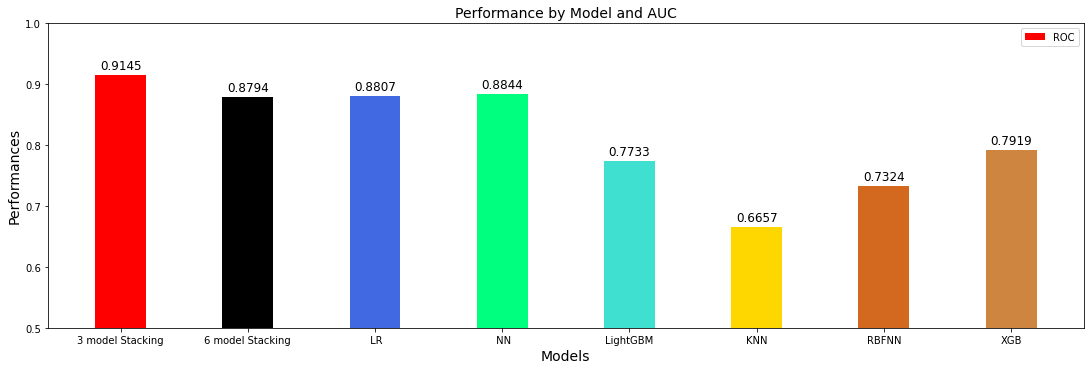

In [314]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.figsize'] = (15.0, 5.0)

labels = ['3 model Stacking','6 model Stacking', ' LR', ' NN', 'LightGBM','KNN','RBFNN','XGB']

AUC_all = [roc_auc1,roc_auc2,roc_auc3,roc_auc4,roc_auc5,roc_auc6,roc_auc7,roc_auc8]


x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x , AUC_all, width, label='ROC',color=['r','k','RoyalBlue','SpringGreen','Turquoise',
                                                       'Gold','chocolate','peru'])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Performance by Model and AUC',fontsize=14)
ax.legend(fontsize=10)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=12)


autolabel(rects2)

fig.tight_layout()

plt.xlabel('Models',fontsize=14)
plt.ylabel('Performances',fontsize=14)

# 设置 x 和 y 轴标尺最大最小值
# plt.xlim(1, 12)
plt.ylim(0.5, 1.0)
# plt.axis([1, 12, 0, 100]) # 一次性设置

# 设置 x 和 y 轴标尺

plt.xticks(np.arange(8), labels)


plt.show()
